<a href="https://colab.research.google.com/github/Edgar-IAH/IA-Grupo-45/blob/main/Semana_7/Redneuronal_Equipo45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

## **Actividad de la Semana 7**
### **Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

* Eduardo Aldair Ahumada García Jurado - A01422929
* Edgar Rodolfo Escobar Gomez - A01793900
* Walter André Hauri Rosales - A01794237
* Héctor Salvador Montañez Alvarez - A01332665
* Jaime Andres Palacios Campaña - A01794023  
 


### *Esta Tarea se deberá resolver en equipos, de acuerdo a como fueron integrados al inicio del curso.*
### *El artículo del 2016 de Moro, Rita & Vala relacionado al presente problema lo encuentras aquí:*

### https://www.semanticscholar.org/paper/predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104*

### *Y el conjunto de datos utilizado es el de la siguiente liga de la UCI: https://archive.ics.uci.edu/ml/datasets/Facebook+metrics*
### *El archivo se llama dataset_Facebook.csv y contiene 500 registros y 19 columnas. El objetivo es determinar el impacto generado por un anuncio de una marca de cosméticos en Facebook, en el cual se intentaron varias variantes en la manera de mostrar el anuncio. Siguiendo el artículo, deberás considerar como predictores o variables de entrada aquellas que se indican en la Tabla 3. Por otro lado, en la Tabla 2, los autores consideran varios casos para la variable de salida, intentando determinar cuál puede ser el mejor caso para medir el éxito de la campaña. Para este ejercicio deberás considerar únicamente los siguientes tres casos como variable de salida: “Lifetime post consumers”, “Lifetime People who have liked a Page and engaged with a post” y “Likes”.*


### *En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.*

In [581]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_validate, learning_curve, validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from math import isnan
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.inspection import permutation_importance

%matplotlib inline

# **Ejercicio-1.**
### *En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las mejores en el artículo antes citado: ‘Lifetime People who have liked a Page and engaged with a post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables que indican los autores en la Tabla 3 del artículo citado.*

In [582]:
# Cargamos la base de datos original
# Este archivo se encuentra en nuestro repositorio github público:
# https://raw.githubusercontent.com/Edgar-IAH/IA-Grupo-45/main/Semana_7/dataset_Facebook.csv


datos_todos = pd.read_csv('https://raw.githubusercontent.com/Edgar-IAH/IA-Grupo-45/main/Semana_7/dataset_Facebook.csv', sep=';')
### USAR LA SIGUIENTE LINEA UNICAMENTE CUANDO EL ARCHIVO DE DATOS SEA LOCAL
#datos = pd.read_csv("dataset_Facebook.csv")

#Rápida observación a los datos
datos_todos.head()


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


# **Ejercicio-2.**
### *Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y validación.*

- Primero chequeamos si existen datos nulos. No esperamos ninguno ya que la base de datos que estamos usando ya ha sido limpiada anteriormente, sin embargo......

In [583]:
print('datos_todos.info():\n================')
datos_todos.info()


datos_todos.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    f

- ...observamos que las variables de entrada "Paid", "share" y "like" contienen un dato nulo cada una. Como las variables "like" y "share" no se utilizarán, la dejamos así. Procedemos a ajustar la variable "Paid"

In [584]:
#Como primera medida le imputamos zero a los None o NaN:

for c in range(len(datos_todos)):
  if isnan(datos_todos.Paid[c]) or datos_todos.Paid[c] is None:
    datos_todos.Paid.loc[c] = 0

#Chequeamos que haya sido correctamente imputado
datos_todos.info()

#Se puede observar que el conteo es de 500 non-null lo cual era lo que se
#buscaba


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 500 non-null    float64
 7   Lifetime

/tmp/ipykernel_297/1069354031.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_todos.Paid.loc[c] = 0


Observamos que la variable Paid fué cargada por Pandas como un float64. Para aplicar la tranformación OneHot necesitamos representarla en binario o al menos como entero. Como existe un valor nulo, le imputamos cero a este valor.


In [585]:

#Reclasificamos el tipo de la variable Paid a int para facilitar
#la transformación OneHot
datos_todos.Paid = datos_todos.Paid.astype(int)

#.... y.....
#Chequeamos de nuevo que nuestro set tenga los tipos requeridos:
datos_todos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 500 non-null    int64  
 7   Lifetime

- Ahora procedemos a extraer sólo las columnas con las que estaremos trabajando y las asignamos a un nuevo dataframe llamado "datos". Al mismo tiempo renombramos las columnas que tienen los nombres más largos.

In [586]:
datos = datos_todos.iloc[:,[0,1,2,3,4,5,6,10,14,16]].rename(columns = {'Lifetime People who have liked your Page and engaged with your post':'LPE'})
datos.rename(columns = {'Lifetime Post Consumers':'LPC'}, inplace = True)
datos.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,LPC,LPE,like
0,139441,Photo,2,12,4,3,0,109,119,79.0
1,139441,Status,2,12,3,10,0,1361,1108,130.0
2,139441,Photo,3,12,3,3,0,113,132,66.0
3,139441,Photo,2,12,2,10,1,790,1386,1572.0
4,139441,Photo,2,12,2,3,0,410,396,325.0


- Volvemos a verificar nuestros conjuntos de datos y chequeamos de nuevo que nuestro set tenga los tipos requeridos:

In [587]:
print('datos:\n==========')
datos.info()

datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page total likes  500 non-null    int64  
 1   Type              500 non-null    object 
 2   Category          500 non-null    int64  
 3   Post Month        500 non-null    int64  
 4   Post Weekday      500 non-null    int64  
 5   Post Hour         500 non-null    int64  
 6   Paid              500 non-null    int64  
 7   LPC               500 non-null    int64  
 8   LPE               500 non-null    int64  
 9   like              499 non-null    float64
dtypes: float64(1), int64(8), object(1)
memory usage: 39.2+ KB


- Re-verificamos que no haya datos nulos. like no se utilizará asi que no importa en este ejercicio

In [588]:
datos.isnull().sum()

Page total likes    0
Type                0
Category            0
Post Month          0
Post Weekday        0
Post Hour           0
Paid                0
LPC                 0
LPE                 0
like                1
dtype: int64

- Ahora si procedemos a hacer la partición en un conjunto de entrenamiento y un conjunto de prueba como se requiere.
El conjunto de entrenamiento será después subdividido en entrenamiento y validación, ya sea internamente por la función de validación cruzada o explícitamente al entrenar y validar algunos de los modelos usados en esta actividad.

In [589]:
# Los datos de entrada son todas las columnas excepto las tres últimas
X = datos.iloc[:, :-3]

# Las variable de salida se encuentra en las tres últimas columnas
Y_like = datos.iloc[:, -1]
Y_LPE = datos.iloc[:, -2]
Y_LPC = datos.iloc[:, -3]

# Asignamos la primera que vamos a trabajar, Y_LPE a Y
Y = Y_LPE

# Usamos la función train_test_split de la libreria sklearn
# Fijamos el generador de números aleatorios con el fin de que los conjuntos
# no cambien en cada corrida
# 100 datos de prueba de los 500 corresponde a 100/500 = .2
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=45
)

norm_Y_train = np.log1p(Y_train)
norm_Y_test = np.log1p(Y_test)

# Chequeamos el tamaño de los conjuntos obtenidos
print(X_train.shape, ": dimensión de datos de entrada de entrenamiento y validación")
print(X_test.shape, ": dimensión de datos de entrada de prueba")
print(
    Y_train.shape, ": dimensión de variable de salida para entrenamiento y validación"
)
print(Y_test.shape, ": dimensión de variable de salida para prueba")


(400, 7) : dimensión de datos de entrada de entrenamiento y validación
(100, 7) : dimensión de datos de entrada de prueba
(400,) : dimensión de variable de salida para entrenamiento y validación
(100,) : dimensión de variable de salida para prueba


- Verificamos nuestros conjuntos de prueba y entrenamiento para confirmar que los cambios hechos a "datos_todos" se hayan tomado también en los subconjuntos, en particular el cambio de tipo de la variable "Type" de float a int:

In [590]:
# Chequeamos de nuevo que nuestro set tenga los tipos requeridos:
print('\nX:\n==========')
X.info()


X:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Page total likes  500 non-null    int64 
 1   Type              500 non-null    object
 2   Category          500 non-null    int64 
 3   Post Month        500 non-null    int64 
 4   Post Weekday      500 non-null    int64 
 5   Post Hour         500 non-null    int64 
 6   Paid              500 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 27.5+ KB


In [591]:
print('\nX_train:\n==========')
X_train.info()


X_train:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 484 to 459
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Page total likes  400 non-null    int64 
 1   Type              400 non-null    object
 2   Category          400 non-null    int64 
 3   Post Month        400 non-null    int64 
 4   Post Weekday      400 non-null    int64 
 5   Post Hour         400 non-null    int64 
 6   Paid              400 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 25.0+ KB


In [592]:
print('X_test:\n==========')
X_test.info()

X_test:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 204 to 138
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Page total likes  100 non-null    int64 
 1   Type              100 non-null    object
 2   Category          100 non-null    int64 
 3   Post Month        100 non-null    int64 
 4   Post Weekday      100 non-null    int64 
 5   Post Hour         100 non-null    int64 
 6   Paid              100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 6.2+ KB


# **Ejercicio-3.**
### *Definirás tus propias funciones de errores para este problema de regresión. Los errores que utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el error porcentual absoluto medio MAPE.*

Las hicimos como es requerido, con nuestras propias funciones, pero también, con las nativas de la librería scikit-learn; inicialmente usamos estas últimas para verificar que las nuestras estuvieran dando los resultados correctos.

In [593]:
def mi_RMSE(y, y_pred):
  return np.sqrt(np.mean((y - y_pred)**2))

def mi_MAE(y, y_pred):
  return np.mean(np.abs(y - y_pred)) 

def mi_MAPE(y, y_pred):
  return np.mean(np.abs((y - y_pred)/y)) * 100


# **Ejercicio-4.**
### *En la página de la UCI, así como en el artículo de los autores previamente citado encuentras información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. Utiliza un Pipeline para evitar el filtrado de información.*

In [594]:
# Iniciamos el análisis con una simple descripción de nuestros datos
datos.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,LPC,LPE,like
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278000,798.772000,609.986000,177.945892
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448462,882.505013,612.725618,323.398742
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,9.000000,9.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,332.500000,291.000000,56.500000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,551.500000,412.000000,101.000000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,955.500000,656.250000,187.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,11328.000000,4376.000000,5172.000000


Histogramas de los datos sin ninguna transformación: 

En esta sección creamos los histogramas sin transformaciones para darnos una idea de las distribuciones


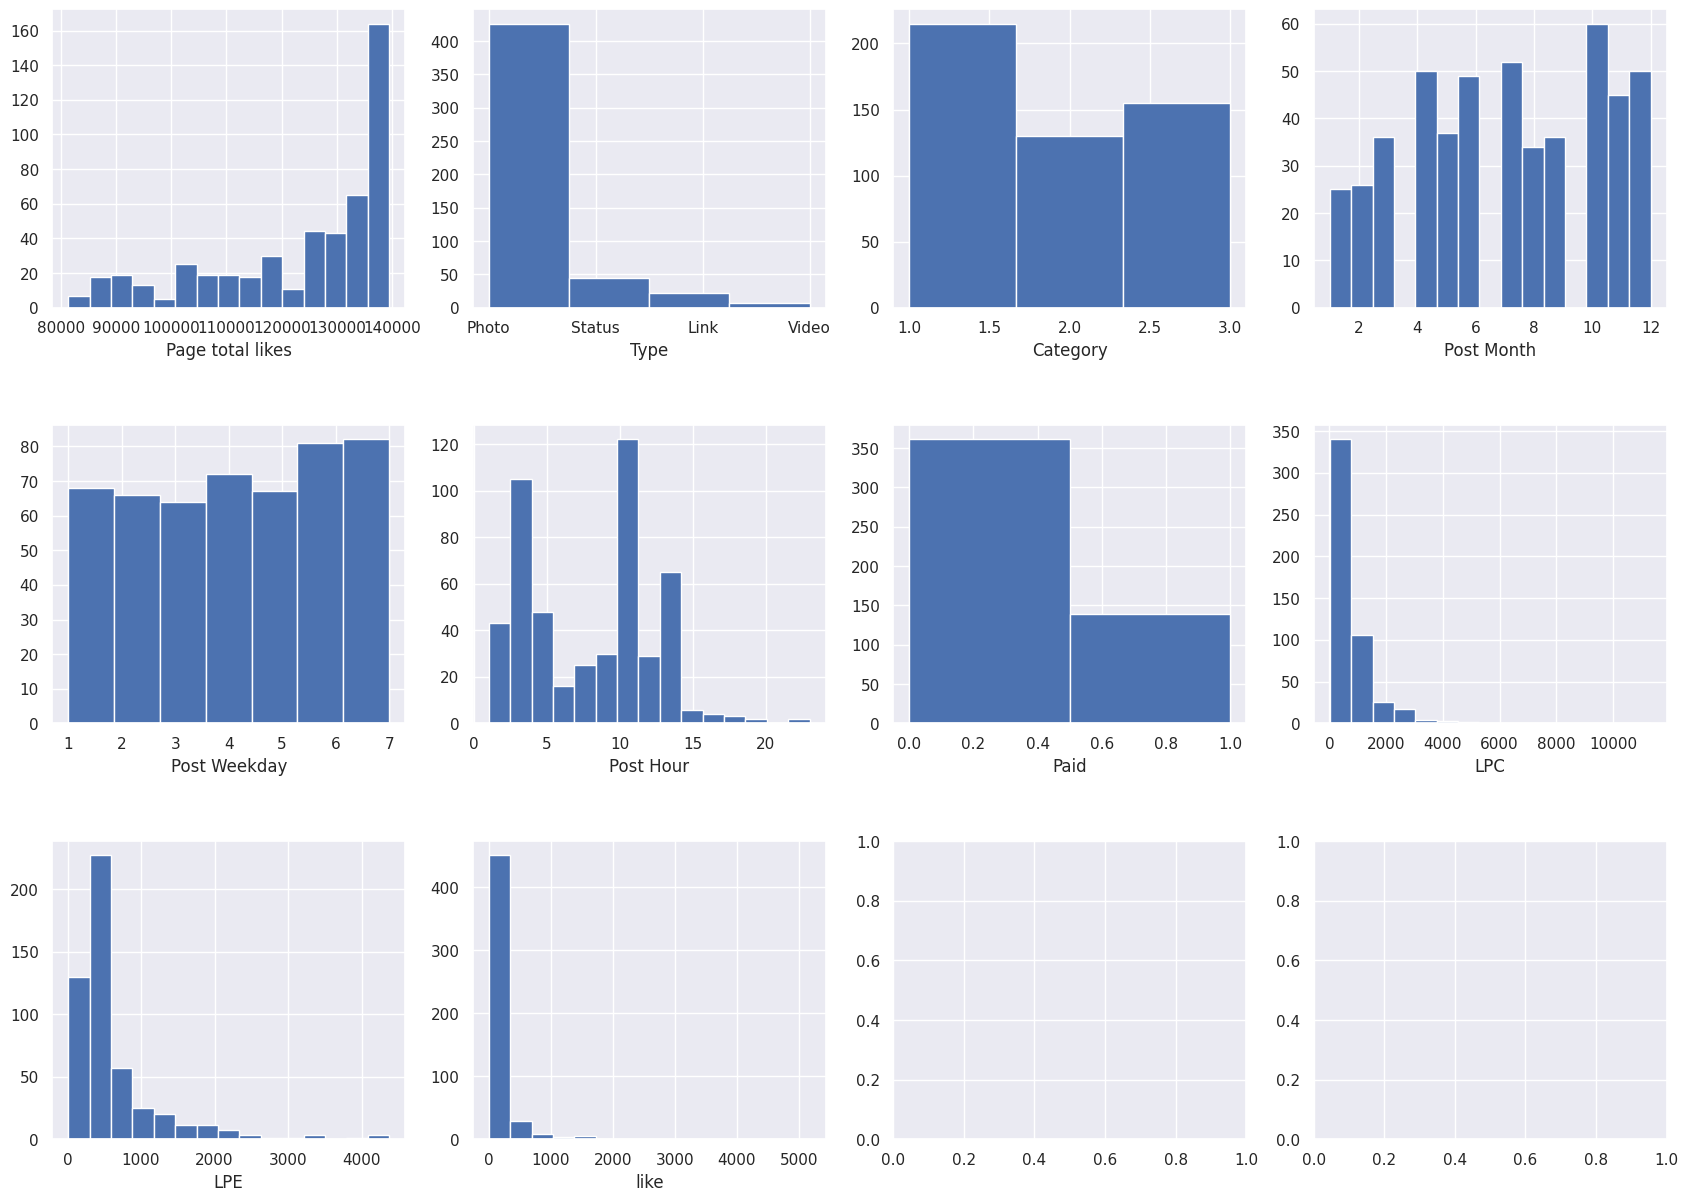

In [595]:
# En esta sección creamos los histogramas sin transformaciones
# para darnos una idea de las distribuciones

# Tamaño de la gráfica
sns.set(rc={"figure.figsize": (17, 12)})
# Crea el espacio de trabajo como una matriz de 3 x 4 para acomodar las 10 variables
fig, axes = plt.subplots(3, 4)
# Espacio entre gráficas
fig.tight_layout(h_pad=5.0)

# Grafica los histogramas uno por uno
for k in range(0, 10):
    # Posición sequencial. Van de 1 a 10 en este caso (no 0)
    plt.subplot(3, 4, k + 1)
    # Número de valores diferentes.
    buckets = datos.iloc[:, k].nunique()
    # Si el número de valores es mayor de 10, declara el número de buckets como 15
    # si es <=10 usa ese número de buckets
    if buckets > 10:
        buckets = 15
    # Crea el histograma
    datos.iloc[:, k].hist(bins=buckets)
    # Nombra el eje X de acuerdo a la columna que está siendo visualizada
    plt.xlabel(datos.columns[k])
# Despliega la figura con las 10 gráficas
plt.show()


In [596]:
# Ahora clasificamos las variables de una manera similar a como lo hicimos en la actividad
# de la semana pasada y usamos la misma imputación:
# imputacion por moda - Categóricos
datos_cat = [
    "Type",
    "Category",
]

# imputacion por moda - Ordinales
datos_ord = [
    "Post Month",
    "Post Weekday",
    "Post Hour",
]

# imputacion por media/mediana - Numéricos
datos_num = ["Page total likes"]

# imputacion por moda - Binarios
datos_bin = ["Paid"]


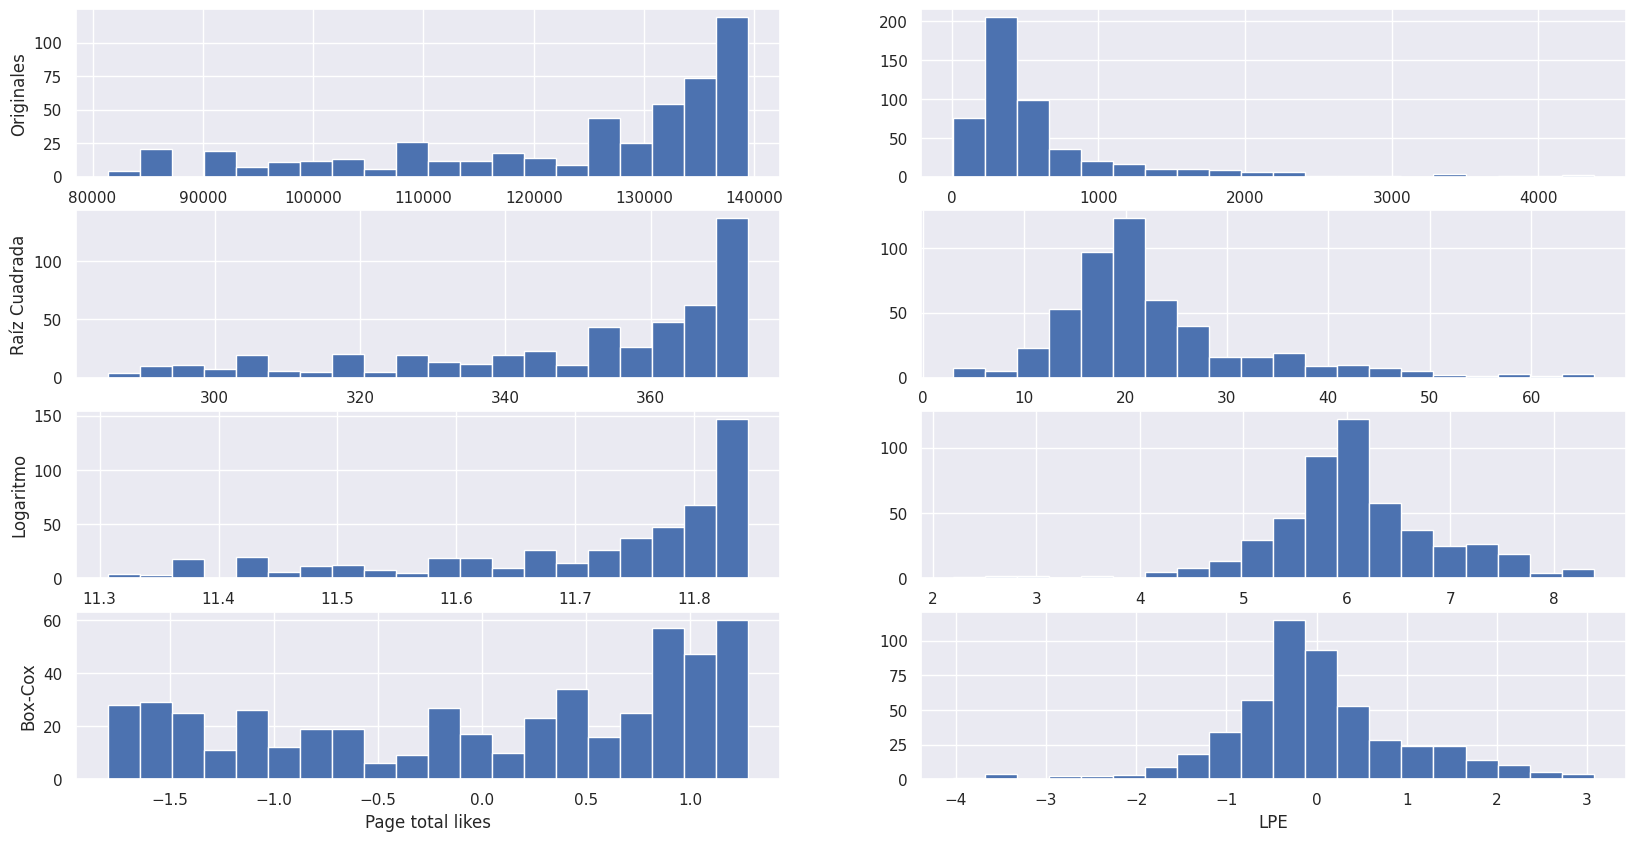

In [597]:
# Mediante histogramas revisamos la distribución de frecuencias para encontrar 
# cual daría la mejor simetria pos-transformación de las variable numéricas

sns.set(rc={"figure.figsize": (20, 10)})
fig, axes = plt.subplots(4, 2)

datos_num_transf = datos_num + ["LPE"]

for k in range(0, 2):

    # Datos originales ---------------------------------------------------------
    plt.subplot(4, 2, k + 1)
    Transf0 = (
        datos[datos_num_transf[k]].values.reshape(-1, 1)
    )  # Se asigna a Transf0 los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf0, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).
    plt.xlabel(datos_num_transf[k])
    if k == 0:
        plt.ylabel("Originales")

    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(4, 2, k + 3)
    Transf1 = np.sqrt(
        Transf0
    )  # Se debe aplica la raíz cuadrada a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf1, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).
    plt.xlabel(datos_num_transf[k])
    if k == 0:
        plt.ylabel("Raíz Cuadrada")

    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(4, 2, k + 5)
    Transf2 = np.log(
        Transf0
    )  # Se aplica el logaritmo natural a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf2, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).
    plt.xlabel(datos_num_transf[k])
    if k == 0:
        plt.ylabel("Logaritmo")

    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(4, 2, k + 7)
    Transf4 = power_transform(
        (datos[datos_num_transf[k]].values.reshape(-1, 1)), method="box-cox"
    )  #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf4, bins=20
    )  #  En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).
    plt.xlabel(datos_num_transf[k])
    if k == 0:
        plt.ylabel("Box-Cox")

In [598]:
#Observamos los conteos por cada clase para todas las variables
for c in datos_cat+datos_bin:
    print(datos[c].value_counts(),'\n')

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64 

1    215
3    155
2    130
Name: Category, dtype: int64 

0    361
1    139
Name: Paid, dtype: int64 



In [599]:
# Observamos las numéricas también
for c in datos_num:
    print(datos[c].value_counts())

136393    18
124940    17
129600    15
139441    14
138895    14
          ..
93470      1
127082     1
93684      1
133451     1
93577      1
Name: Page total likes, Length: 90, dtype: int64


- Observación de los valores únicos en todas las columnas. Comparamos con los valores registrados en el artículo de la referencia (Moro et all, 2016) con el fin de asegurarnos de que no haya valores en los datos que no estén documentados Resultado negativo, lo cual es bueno. Todos los valores usados en los datos están referenciados en artículo de la referencia (Moro et all, 2016)

In [600]:
for v in datos_cat+datos_bin: #datos.columns:
    print(v)
    print(datos[v].unique())
    print("-----")

Type
['Photo' 'Status' 'Link' 'Video']
-----
Category
[2 3 1]
-----
Paid
[0 1]
-----


# **Pipeline**

### Debido a que hacemos transformaciones a las variables de entrada, más adelante estamos utilizando la variable de salida LPE también con una transformación. En este caso antes del punto 5 se pueden ver las gráficas de la variable de salida con y sin transformación, podemos ver que la transformación es necesario ya que logramos pasar de una distribución long tail a una distribución más normal.

In [601]:
# En esta sección de código definimos las transformaciones
# ========================================================
# Transformaciones a factores categóricos y binarios de entrada:

cat_pipeline = Pipeline(
    steps=[
        ("impModa", SimpleImputer(strategy="most_frequent")),
        ("OneHotE", OneHotEncoder(handle_unknown="ignore")),
    ]
)
cat_pipeline_nombres = datos_cat

# Transformaciones a factores ordinales de entrada:
ord_pipeline = Pipeline(
    steps=[
        ("impModa", SimpleImputer(strategy="most_frequent")),
    ]
)
ord_pipeline_nombres = datos_ord

# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(
    steps=[
        ("impMediana", SimpleImputer(strategy="median")),
        ("Box-Cox", PowerTransformer(method="box-cox")),
        ("escalaNum", MinMaxScaler()),
    ]
)
num_pipeline_nombres = datos_num

bin_pipeline_nombres = datos_bin

# Conjuntamos las transformaciones que se aplicarán a los datos de entrada:
columnasTransformer = ColumnTransformer(
    transformers=[
        ("catpipe", cat_pipeline, cat_pipeline_nombres + bin_pipeline_nombres),
        ("numpipe", num_pipeline, num_pipeline_nombres),
        ("ordpipe", ord_pipeline, ord_pipeline_nombres),
    ],
    remainder="passthrough",
)



- Para estas transformaciones, primero tratamos las variables month, weekday y hour como variables categóricas normales, y aplicabamos imputación por moda y one-hot encoding. Sin embargo, notabamos que con este pipeline, las variables no convergían y muchas parecían meter ruido al modelo en lugar de ayudar. Por lo tanto, decidimos tratar estas variables como categóricas ordinales, y solo les aplicamos imputación por moda y no one-hot encoding.

<AxesSubplot: xlabel='LPE', ylabel='Count'>

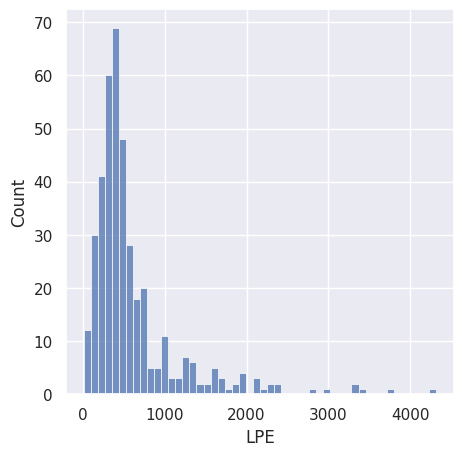

In [602]:
sns.set(rc={"figure.figsize": (5, 5)})
sns.histplot(Y_train, bins=50)

- Aquí graficamos la distribución de la variables de salida SIN transformación logarítmica. **Podemos ver que el rango va de 0 a 4000.**

<AxesSubplot: xlabel='LPE', ylabel='Count'>

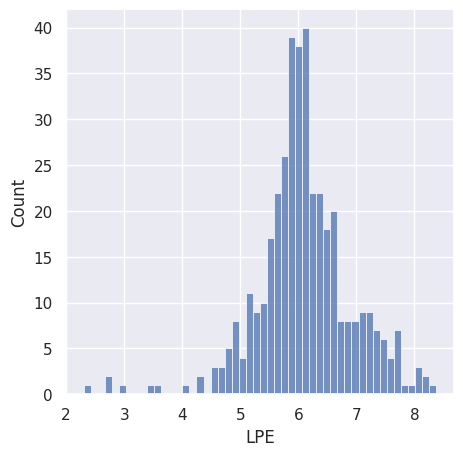

In [603]:
sns.histplot(norm_Y_train, bins=50)


- Aquí graficamos la distribución de la variables de salida con transformación logarítmica. Observamos que la distribución es más normal y que la media es más cercana a la mediana. Esto nos indica que la transformación logarítmica es una buena opción para esta variable. **Podemos ver que el rango va de 0 a 8.**

# **Ejercicio-5.**
### *Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la actividad. Consulta su documentación correspondiente: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html*

In [604]:
X_val_dummy, X_train_dummy, Y_val_dummy, Y_train_dummy = train_test_split(X_train, norm_Y_train, train_size=0.25, random_state=45)   # realizamos la partición.

print(len(X_train_dummy), len(X_val_dummy), len(Y_train_dummy), len(Y_val_dummy))

modeloDummy = DummyRegressor() # estrategia default es mean, siempre se predice la media de los datos de entrenamiento

modeloDummy.fit(X_train_dummy, Y_train_dummy)       # entrenamos con los conjuntos de entrenamiento

yhat_train_dummy = modeloDummy.predict(X_train_dummy)
yhat_val_dummy = modeloDummy.predict(X_val_dummy)

print('===============================\nDUMMY REGRESSOR:\n===============================')
print('ENTRENAMIENTO:')
print('mi_RMSE: ', mi_RMSE(Y_train_dummy, yhat_train_dummy))
print('mi_MAE: ', mi_MAE(Y_train_dummy, yhat_train_dummy))
print('mi_MAPE: ', mi_MAPE(Y_train_dummy, yhat_train_dummy))

print('VALIDACION:')
print('mi_RMSE: ', mi_RMSE(Y_val_dummy, yhat_val_dummy))
print('mi_MAE: ', mi_MAE(Y_val_dummy, yhat_val_dummy))
print('mi_MAPE: ', mi_MAPE(Y_val_dummy, yhat_val_dummy))


300 100 300 100
DUMMY REGRESSOR:
ENTRENAMIENTO:
mi_RMSE:  0.8395930504255746
mi_MAE:  0.6106662136138541
mi_MAPE:  10.741255281936988
VALIDACION:
mi_RMSE:  0.756328445776648
mi_MAE:  0.5016741738579495
mi_MAPE:  9.52653807896952


- Tomando en cuenta que se usa la variable salida con transformación logarítmica, notamos que el RMSE es de 0.84 y 0.76 para los conjuntos de entrenamiento y validación. Mientras menor sean estos valores, mejor será el modelo, el objetivo será vencer entonces a estos valores.

# **Ejercicio-6.**
### *Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada (RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de iteraciones para que todos los modelos converjan.*


In [605]:
def createModels():
    return {
        "LR": LinearRegression(), # Multiple linear regression
        "RF": RandomForestRegressor(), # Random forest regression
        "MLP": MLPRegressor(max_iter=5000), # Multi-layer perceptron (must increase number of iterations)
    }

In [606]:
models = createModels() # Instantiate models
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=45) # k-folds cross-validation

# Metrics to evaluate model
metrics = {
    "RMSE": make_scorer(mi_RMSE, greater_is_better=False),
    "MAE": make_scorer(mi_MAE, greater_is_better=False),
    "MAPE": make_scorer(mi_MAPE, greater_is_better=False),
}

results = []

# Iterate over models
for name, model in models.items():
    pipeline = Pipeline(steps=[("ct", columnasTransformer), ("m", model)]) # make pipeline with this model
    print(f'==============================={name}:===============================')
    scores = cross_validate(pipeline, X_train, norm_Y_train, scoring=metrics, cv=cv, return_train_score=True, n_jobs=-1)
    results.append(scores) # Add scores to results for this model

    print('ENTRENAMIENTO:')
    print('mean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (
                                                                          np.mean(scores['train_RMSE']) * -1,
                                                                          np.std(scores['train_RMSE']),
                                                                          np.mean(scores['train_MAE']) * -1,
                                                                          np.std(scores['train_MAE']), 
                                                                          np.mean(scores['train_MAPE']) * -1,
                                                                          np.std(scores['train_MAPE']),
                                                                          ))
    
    print('VALIDACION (interna al método de validación cruzada):')
    print('mean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (
                                                                          np.mean(scores['test_RMSE']) * -1,
                                                                          np.std(scores['test_RMSE']),
                                                                          np.mean(scores['test_MAE']) * -1,
                                                                          np.std(scores['test_MAE']), 
                                                                          np.mean(scores['test_MAPE']) * -1,
                                                                          np.std(scores['test_MAPE']),
                                                                          ))
    

===============================LR:===============================
ENTRENAMIENTO:
mean RMSE: 0.673 (0.0155)
mean MAE: 0.451 (0.0069)
mean MAPE: 8.154 (0.2277)

VALIDACION (interna al método de validación cruzada):
mean RMSE: 0.694 (0.0605)
mean MAE: 0.467 (0.0304)
mean MAPE: 8.444 (1.1621)

===============================RF:===============================
ENTRENAMIENTO:
mean RMSE: 0.284 (0.0093)
mean MAE: 0.191 (0.0045)
mean MAPE: 3.415 (0.1044)

VALIDACION (interna al método de validación cruzada):
mean RMSE: 0.735 (0.0585)
mean MAE: 0.509 (0.0382)
mean MAPE: 9.072 (1.0213)

===============================MLP:===============================
ENTRENAMIENTO:
mean RMSE: 0.591 (0.0324)
mean MAE: 0.395 (0.0202)
mean MAPE: 7.110 (0.4128)

VALIDACION (interna al método de validación cruzada):
mean RMSE: 0.742 (0.0685)
mean MAE: 0.502 (0.0437)
mean MAPE: 9.020 (1.0950)



- Con estos resultados podemos observar sin parámetros, los modelos se desempeñan mal. También se observa sobreentrenamiento en los modelos RF y MLP ya que como se puede ver el error es más bajo para los datos de entrenamiento que para los de validación. También se puede decir que tenemos un subentrenamiento en todos los modelos, ya que los errores son muy altos. El rango de la variable de salida es de 0 a 8, por lo que un error de 0.67, 0.69, 0.74 son muy altos.

# **Ejercicio-7.**
### *Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que encuentran los autores del artículo citado al inicio. Incluye tus conclusiones.*

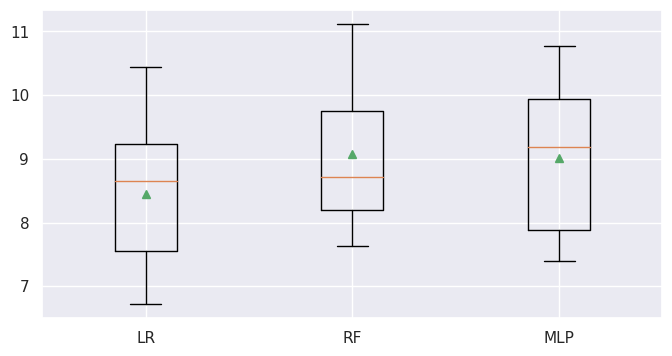

In [607]:
#Imprimimos las metricas
sns.set(rc={'figure.figsize':(8,4)})

bp_MAPE = list()

for i in range(len(results)):
  rr = results[i]['test_MAPE'] * -1
  bp_MAPE.append(rr)

plt.boxplot(bp_MAPE, labels=models.keys(), showmeans=True)

plt.show()

Resultados de los autores del artículo:

![paper_mape](https://github.com/Edgar-IAH/IA-Grupo-45/raw/main/Semana_7/images/paper_mape.jpeg)


# **Ejercicio-8.**
### *Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados.*

In [608]:
mi_modelo_mlp = MLPRegressor(max_iter=5000, random_state=45) # creamos el modelo
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=45) # k-folds cross-validation

#dicc_grid = {'hidden_layer_sizes': [(10, 10, 10), (50, 50, 50), (100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100)],
#             'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
#             'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1]}

dicc_grid = {'hidden_layer_sizes': [(50, 50, 50)],
             'alpha':[0.001, 0.002, 0.0005],
             'learning_rate_init': [0.09, 0.1, 0.11]}


#================================================

grid = GridSearchCV(estimator=mi_modelo_mlp, param_grid=dicc_grid, scoring=make_scorer(mi_MAPE, greater_is_better=False), cv=cv, n_jobs=-1)

# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_train)

grid.fit(Xx, np.ravel(norm_Y_train))

print('Mejor valor de score:', grid.best_score_ * -1)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

#Modelo con los mejores hiperparámetros extraídos del del barrido con GridSearchCV
mejor_modelo_mlp = MLPRegressor( max_iter=5000,
                                random_state=45,
                                hidden_layer_sizes=grid.best_params_.get('hidden_layer_sizes'),
                                alpha=grid.best_params_.get('alpha'),
                                learning_rate_init=grid.best_params_.get('learning_rate_init'))

#Guardamos los mejores hiperparámetros extraídos del barrido con GridSearchCV
mejores_params_mlp = grid.best_params_

Mejor valor de score: 8.519373781833538
Mejor combinación de valores encontrados de los hiperparámetros: {'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate_init': 0.1}
Métrica utilizada: make_scorer(mi_MAPE, greater_is_better=False)


In [609]:
# Results over test set
print('PRUEBA:')

# Fit best model and test it
pipe = Pipeline(steps=[("ct", columnasTransformer), ("m", mejor_modelo_mlp)]) # make pipeline with this model
pipe.fit(X_train, norm_Y_train) # fit model

predictions = pipe.predict(X_test) # Compute predictions over test set

print('RMSE: %.3f\nMAE: %.3f\nMAPE: %.3f\n' % (
    mi_RMSE(norm_Y_test, predictions),
    mi_MAE(norm_Y_test, predictions),
    mi_MAPE(norm_Y_test, predictions),
))


PRUEBA:
RMSE: 0.719
MAE: 0.477
MAPE: 8.446



# **Ejercicio-9.**
### *Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones.*

El histograma horizontal mostrando la importancia de las variables de entrada no puede ser mostrado usando los métodos aprendidos hasta el momento debido a que este modelo no provee el atributo que contiene esta información.

Se obtiene el siguiente error de la librería: Scikit-learn

*'MLPRegressor' object has no attribute 'feature_importances_'*

Feature: Page total likes, Score: 0.00301
Feature: Type-Photo, Score: 0.42843
Feature: Type-Status, Score: 1.30620
Feature: Type-Link, Score: 0.16383
Feature: Type-Video, Score: 0.79494
Feature: Category-Action, Score: 0.57417
Feature: Category-Product, Score: 0.82143
Feature: Category-Insp., Score: 0.52217
Feature: Post Month, Score: 0.70499
Feature: Post Weekday, Score: 0.00018
Feature: Post Hour, Score: 0.10039
Feature: Paid-No, Score: 0.00709
Feature: Paid-Paid, Score: 0.00315


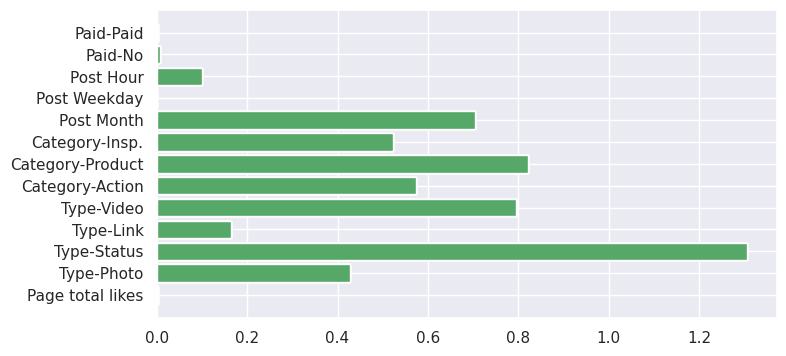

In [610]:
clf = mejor_modelo_mlp.fit(Xx, np.ravel(norm_Y_train))
importance = permutation_importance(mejor_modelo_mlp, Xx, np.ravel(norm_Y_train), n_repeats=10) 
order_features = ['Page total likes', 'Type-Photo', 'Type-Status', 'Type-Link', 'Type-Video', 'Category-Action', 'Category-Product', 'Category-Insp.', 'Post Month', 'Post Weekday','Post Hour', 'Paid-No', 'Paid-Paid']
# visualicemos la importancia de cada métrica, de las cuales sabemos 
# cuáles son las más importantes, de acuerdo a como se definieron al inicio: 
for i,v in enumerate(importance['importances_mean']): 
  print('Feature: %s, Score: %.5f' % (order_features[i],v)) 
  # plt.barh([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
  plt.barh([x for x in order_features], importance['importances_mean'])

plt.show()

Observamos que para la variable de salida (Life time People who have liked a Page and engaged with a post) la variable de entrada que más influencia tiene en los resultados es:  [Type]

Que contiene [Link, Photo, Status, Video] tiene sentido este resultado ya que es el medio por el cual se empieza el engagement con el público.

# **Ejercicio-10.**
### *Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras.*

### Buscando mejores parámetros

In [611]:
mi_modelo_RF = RandomForestRegressor()
#ccp_alpha, criterion, max_depth, min_samples_split y class_weight

#dicc_grid = {'ccp_alpha':[0.0, 0.0001, 0.001, 0.01, 0.1],
#             'criterion':["squared_error", "absolute_error", "poisson"],
#             'max_depth':range(1,21,2),
#             'min_samples_split':range(2, 12, 2),
#            }

dicc_grid = {'ccp_alpha':[0.0, 0.0001, 0.0002],
             'criterion':["absolute_error"],
             'max_depth':range(3,6,1),
             'min_samples_split':range(9, 12, 1),
            }
#================================================

grid = GridSearchCV(estimator=mi_modelo_RF, param_grid=dicc_grid, cv=cv, scoring=make_scorer(mi_RMSE, greater_is_better=False),n_jobs=-1)

# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_train)
# Llevamos a cabo el proceso de entrenamiento con validación-cruzada y búsqueda de malla

grid.fit(Xx, np.ravel(norm_Y_train))
print('Mejor valor de RMSE obtenido con la mejor combinación:', grid.best_score_ * -1)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de RMSE obtenido con la mejor combinación: 0.6807673306394371
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_split': 11}
Métrica utilizada: make_scorer(mi_RMSE, greater_is_better=False)


### Haciendo predicciones sobre el conjunto de prueba

In [612]:
#Modelo con los mejores hiperparámetros extraídos del del barrido con GridSearchCV
mejor_modelo_RF = RandomForestRegressor(ccp_alpha=grid.best_params_.get('ccp_alpha'),
                                criterion=grid.best_params_.get('criterion'),
                                max_depth=grid.best_params_.get('max_depth'),
                                min_samples_split=grid.best_params_.get('min_samples_split'),
                                )

#Guardamos los mejores hiperparámetros extraídos del barrido con GridSearchCV
mejores_params_RF = grid.best_params_


# Results over test set
print('PRUEBA:')

# Fit best model and test it
pipe = Pipeline(steps=[("ct", columnasTransformer), ("m", mejor_modelo_RF)]) # make pipeline with this model
pipe.fit(X_train, norm_Y_train) # fit model

predictions = pipe.predict(X_test) # Compute predictions over test set



print('RMSE: %.3f\nMAE: %.3f\nMAPE: %.3f\n' % (
    mi_RMSE(norm_Y_test, predictions),
    mi_MAE(norm_Y_test, predictions),
    mi_MAPE(norm_Y_test, predictions),
))


PRUEBA:
RMSE: 0.688
MAE: 0.472
MAPE: 8.375



<BarContainer object of 13 artists>

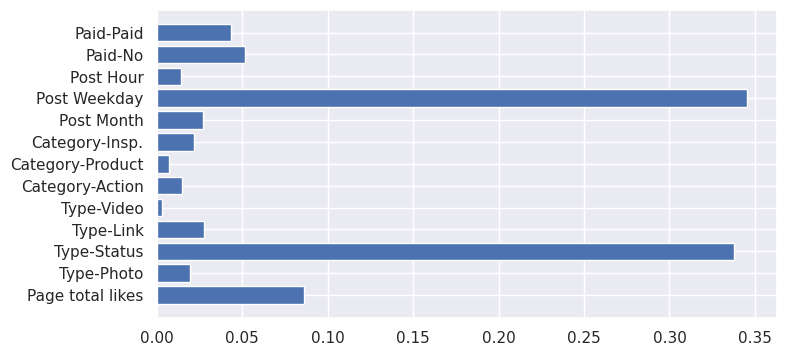

In [613]:
clf = mejor_modelo_RF.fit(Xx, np.ravel(norm_Y_train))
plt.barh(order_features, width = clf.feature_importances_)


Observamos que para la variable de salida (Life time People who have liked a Page and engaged with a post) la variable de entrada que más influencia tiene en los resultados es: [Weekday]

Es esperado ya que la actividad en redes sociales es en gran parte dependiente al tiempo disponible durante la semana, quizás siendo los fines de semana los días con más disponibilidad para navegar.

# **Ejercicio-11.**
### *Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras.*


### Buscando mejores parámetros

In [614]:
mi_modelo_LR = LinearRegression()
# LinearRegression().get_params().keys() = copy_X, fit_intercept, n_jobs, normalize, positive

dicc_grid = {'fit_intercept': [True, False], 
            #'normalize': [True, False], # Deprecated and replaced by StandarScaler
            #'positive': [True, False], # Make values goes to inf
            }
#================================================

grid = GridSearchCV(estimator=mi_modelo_LR, param_grid=dicc_grid, cv=cv, scoring=make_scorer(mi_RMSE, greater_is_better=False),n_jobs=-1)

# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_train)
# Llevamos a cabo el proceso de entrenamiento con validación-cruzada y búsqueda de malla

grid.fit(Xx, np.ravel(norm_Y_train))
print('Mejor valor de RMSE obtenido con la mejor combinación:', grid.best_score_ * -1)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de RMSE obtenido con la mejor combinación: 0.6944252480208281
Mejor combinación de valores encontrados de los hiperparámetros: {'fit_intercept': True}
Métrica utilizada: make_scorer(mi_RMSE, greater_is_better=False)


### Haciendo predicciones sobre el conjunto de prueba

In [615]:
#Modelo con los mejores hiperparámetros extraídos del del barrido con GridSearchCV
mejor_modelo_LR = LinearRegression(fit_intercept=grid.best_params_.get('fit_intercept'))

#Guardamos los mejores hiperparámetros extraídos del barrido con GridSearchCV
mejores_params_LR = grid.best_params_

# Results over test set
print('PRUEBA:')

# Fit best model and test it
pipe = Pipeline(steps=[("ct", columnasTransformer), ("m", mejor_modelo_LR)]) # make pipeline with this model
pipe.fit(X_train, norm_Y_train)

predictions = pipe.predict(X_test) # Compute predictions over test set
print('RMSE: %.3f\nMAE: %.3f\nMAPE: %.3f\n' % (
    mi_RMSE(norm_Y_test, predictions),
    mi_MAE(norm_Y_test, predictions),
    mi_MAPE(norm_Y_test, predictions),
))

PRUEBA:
RMSE: 0.725
MAE: 0.501
MAPE: 8.989



Feature: Page total likes, Score: 0.18722
Feature: Type-Photo, Score: 0.04258
Feature: Type-Status, Score: 0.26712
Feature: Type-Link, Score: 0.01537
Feature: Type-Video, Score: 0.00000
Feature: Category-Action, Score: 0.00438
Feature: Category-Product, Score: 0.00503
Feature: Category-Insp., Score: 0.00275
Feature: Post Month, Score: 0.00275
Feature: Post Weekday, Score: 0.50883
Feature: Post Hour, Score: 0.94865
Feature: Paid-No, Score: 0.00609
Feature: Paid-Paid, Score: 0.00022


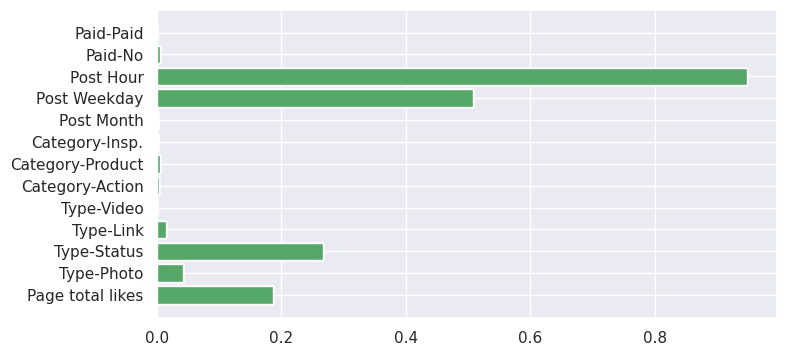

In [616]:
clf = mejor_modelo_LR.fit(Xx, np.ravel(norm_Y_train))
importance = permutation_importance(mejor_modelo_LR, Xx, np.ravel(norm_Y_train), n_repeats=10) 
order_features = ['Page total likes', 'Type-Photo', 'Type-Status', 'Type-Link', 'Type-Video', 'Category-Action', 'Category-Product', 'Category-Insp.', 'Post Month', 'Post Weekday','Post Hour', 'Paid-No', 'Paid-Paid']
# visualicemos la importancia de cada métrica, de las cuales sabemos 
# cuáles son las más importantes, de acuerdo a como se definieron al inicio: 
for i,v in enumerate(importance['importances_mean']): 
  print('Feature: %s, Score: %.5f' % (order_features[i],v)) 
  # plt.barh([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
  plt.barh([x for x in order_features], importance['importances_mean'])

plt.show()

Con el modelo de LR encontramos que la variable que más influencia tiene en el resultado de la variable de la salida es: [Post Hour] , utilizando la misma lógica del día de la semana, tenemos una distinta disponibilidad de tiempo durante el día, quizás las horas no laborales pueden tener más usuarios activos en las  redes sociales. Siendo así una variable a considerar al momento de tomar decisiones para el engagement con el cliente

# **Ejercicio-12.**
### *Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con respecto a MAPE. Incluye tus conclusiones finales de la actividad.*

Después de limpiar los datos de entrada y evaluar diferentes modelos de predicción, encontramos un MAPE ( Mean Absolute Percentage Error) ya con los mejores  hiper parámetros de:

- MLP (Multilayer Perception) = 8.6%
- RF (Random Forest) =  8.5% 
- LR (Linear Regression) = 9%

Concluimos que Random Forest obtuvo el mejor desempeño. Como se puede ver arriba, tomando en cuenta solo la métrica del MAPE. 

Al comparar nuestros resultados con los obtenidos por el artículo Moro et al (2016), observamos que nuestras predicciones son más cercanas a los valores reales 8.5% contra 26.9% 
Esta diferencia es bastante considerable, es posible que hayamos obtenido un mejor resultado debido a las transformaciones que realizamos al inicio:

1. One hot encoder para variables categóricas e imputación de valores faltantes por moda
2. Consideramos variables ordinales para variables de entrada de tipo  temporal (Month, Weekday y Hour) y solo aplicamos imputación por moda
3. Ajustamos variables de entrada y salida mediante transformación Box-Cox


# Referencias

- Sadangi, S., (21 de Julio de 2022). How to Deal With Files in Google Colab: Everything You Need to Know. Neptune Labs. https://neptune.ai/blog/google-colab-dealing-with-files
- Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O’Reilly Media, Inc.
- Moro, S., Rita, P. D., & Bala, B. (2016). *Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach.* Journal of Business Research. https://www.semanticscholar.org/paper/predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104 
- scikit-learn.org. (s.f.). sklearn.model_selection.GridSearchCV scikit-learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- scikit-learn.org. (s.f.). sklearn.dummy.DummyRegressor scikit-learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

### **Fin de la Actividad de la semana 7.**